In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import random
#sizes = [10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
sizes = list(range(100,1000000,100))

# Sorting

## Bubble Sort

The bubble sort makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place. In essence, each item “bubbles” up to the location where it belongs.

In [35]:
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                alist[i], alist[i+1] =  alist[i+1], alist[i]

alist = [54,26,93,17,77,31,44,55,20]
bubbleSort(alist)
print(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [36]:
def sortGrapher(sortfn):
    timelist = []
    for size in sizes:
        thelist = list(range(size))
        random.shuffle(thelist)
        start = time.time()
        sortfn(thelist)
        end = time.time()
        elapsed = end - start
        #print("{}\t{}".format(size,elapsed))
        timelist.append(elapsed)
        if elapsed > 120:
            break
    plt.plot(sizes[:len(timelist)],timelist)
    return timelist


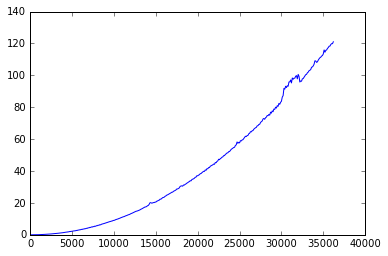

In [37]:
bubbleTimes = sortGrapher(bubbleSort)

## Selection Sort

The selection sort improves on the bubble sort by making only one exchange for every pass through the list. In order to do this, a selection sort looks for the largest value as it makes a pass and, after completing the pass, places it in the proper location. As with a bubble sort, after the first pass, the largest item is in the correct place. After the second pass, the next largest is in place. This process continues and requires n−1
n-1 passes to sort n items, since the final item must be in place after the (n−1)st pass.

In [38]:
def selectionSort(alist):
   for fillslot in range(len(alist)-1,0,-1):
       positionOfMax=0
       for location in range(1,fillslot+1):
           if alist[location]>alist[positionOfMax]:
               positionOfMax = location

       temp = alist[fillslot]
       alist[fillslot] = alist[positionOfMax]
       alist[positionOfMax] = temp

alist = [54,26,93,17,77,31,44,55,20]
selectionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


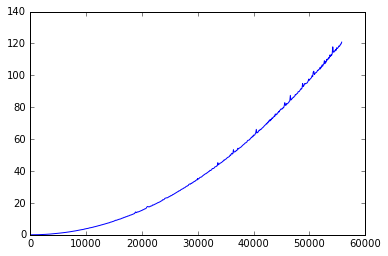

In [39]:
selectionTimes = sortGrapher(selectionSort)

## Insertion Sort

The insertion sort, although still $O(n^2)$ works in a slightly different way. It always maintains a sorted sublist in the lower positions of the list. Each new item is then “inserted” back into the previous sublist such that the sorted sublist is one item larger. Figure 4 shows the insertion sorting process. The shaded items represent the ordered sublists as the algorithm makes each pass.

We begin by assuming that a list with one item (position 0) is already sorted. On each pass, one for each item 1 through n−1 the current item is checked against those in the already sorted sublist. As we look back into the already sorted sublist, we shift those items that are greater to the right. When we reach a smaller item or the end of the sublist, the current item can be inserted.


In [40]:
def insertionSort(alist):
   for index in range(1,len(alist)):

     currentvalue = alist[index]
     position = index

     while position>0 and alist[position-1]>currentvalue:
         alist[position]=alist[position-1]
         position = position-1

     alist[position]=currentvalue

alist = [54,26,93,17,77,31,44,55,20]
insertionSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


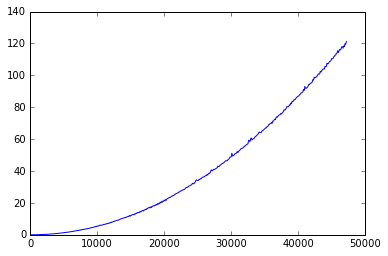

In [41]:
insertionTimes = sortGrapher(insertionSort)

## Shell Sort

The shell sort, sometimes called the “diminishing increment sort,” improves on the insertion sort by breaking the original list into a number of smaller sublists, each of which is sorted using an insertion sort. The unique way that these sublists are chosen is the key to the shell sort. Instead of breaking the list into sublists of contiguous items, the shell sort uses an increment i, sometimes called the gap, to create a sublist by choosing all items that are i items apart.

In [ ]:
def shellSort(alist):
    sublistcount = len(alist)//2
    while sublistcount > 0:

        for startposition in range(sublistcount):
            gapInsertionSort(alist,startposition,sublistcount)


        sublistcount = sublistcount // 2

def gapInsertionSort(alist,start,gap):
    for i in range(start+gap,len(alist),gap):

        currentvalue = alist[i]
        position = i

        while position>=gap and alist[position-gap]>currentvalue:
            alist[position]=alist[position-gap]
            position = position-gap

        alist[position]=currentvalue

alist = [54,26,93,17,77,31,44,55,20]
shellSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [ ]:
shellTimes = sortGrapher(shellSort)


In [ ]:
plt.plot(sizes[:len(bubbleTimes)],bubbleTimes)
plt.plot(sizes[:len(selectionTimes)],selectionTimes)
plt.plot(sizes[:len(insertionTimes)],insertionTimes)
plt.plot(sizes[:len(shellTimes)],shellTimes)


In [ ]:
plt.plot(sizes[:6],bubbleTimes[:6])
plt.plot(sizes[:6],selectionTimes[:6])
plt.plot(sizes[:6],insertionTimes[:6])
plt.plot(sizes[:6],shellTimes[:6])

## Merge Sort

We now turn our attention to using a divide and conquer strategy as a way to improve the performance of sorting algorithms. The first algorithm we will study is the merge sort. Merge sort is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). If the list has more than one item, we split the list and recursively invoke a merge sort on both halves. Once the two halves are sorted, the fundamental operation, called a merge, is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single, sorted, new list.


In [ ]:
def mergeSort(alist):
    #print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    #print("Merging ",alist)

alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)



## QuickSort

The quick sort uses divide and conquer to gain the same advantages as the merge sort, while not using additional storage. As a trade-off, however, it is possible that the list may not be divided in half. When this happens, we will see that performance is diminished.

A quick sort first selects a value, which is called the pivot value. Although there are many different ways to choose the pivot value, we will simply use the first item in the list. The role of the pivot value is to assist with splitting the list. The actual position where the pivot value belongs in the final sorted list, commonly called the split point, will be used to divide the list for subsequent calls to the quick sort.


In [ ]:
def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark

alist = [54,26,93,17,77,31,44,55,20]
quickSort(alist)
print(alist)

